<a href="https://colab.research.google.com/github/KoreTane/PredictiveLeadManagement/blob/main/Data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xlsxwriter
#!pip install pandas-profiling==3.3.0

In [ ]:
import pandas as pd  # Manipulação de dados em formato de tabela
import numpy as np  # Para operações numéricas
from scipy import stats  # Para estatística e análise de dados
import xlsxwriter  # Criar e manipular arquivos Excel
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca para visualização de dados
from scipy.stats import chi2_contingency  # Função para calcular a estatística de qui-quadrado
import math  # Operações matemáticas
#from pandas_profiling import ProfileReport  # Biblioteca para geração de relatórios de perfil de dados
import datetime
import warnings

In [ ]:
df = pd.read_excel('CBS_CRM.xlsx', skiprows=1)
warnings.filterwarnings('ignore')

<h1><font size="5" color="#FF69B4">Tratamento dos dados</font></h1>

<p><font size="4">Nesta seção, vamos tratar os dados para prepará-los para a análise. Isso inclui:

* Visualização dos dados para entender a distribuição e a estrutura
* Tratamento de valores ausentes e outliers
* Transformação de variáveis para melhorar a análise.</font></p>

In [ ]:
df.drop('Unnamed: 15', axis=1, inplace=True)

In [ ]:
# Fornece uma visão geral rápida e fácil de entender dos dados, incluindo informações sobre valores ausentes, registros duplicados, variáveis categóricas e numéricas, correlações e histogramas.
#df.profile_report()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QTDE              204 non-null    float64       
 1   DATA 1º CONTATO   1672 non-null   object        
 2   NOME COMPLETO     1670 non-null   object        
 3   IDADE             1428 non-null   object        
 4   TELEFONE          1591 non-null   object        
 5   STATUS            1668 non-null   object        
 6   VIA               1668 non-null   object        
 7   ESTILOS           1664 non-null   object        
 8   DATA AGENDAMENTO  223 non-null    datetime64[ns]
 9   HORÁRIO           1301 non-null   object        
 10  PROFESSOR         1373 non-null   object        
 11  COMPARECEU        1650 non-null   object        
 12  REAGENDAMENTO     37 non-null     object        
 13  SITUAÇÃO          1640 non-null   object        
 14  OBSERVAÇÕES       838 no

In [ ]:
# Identificar e mostrar valores nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))# shape retorna tupla, com quantidade de linha e colunas
  .sort_values('missing_count', ascending=False)
)
# Formatando para duas casas decimais (convertendo em porcentagem, normal seria 2f)
df_missing.style.format('{:.2%}', subset=['missing_pct'])
# Somente formatando o missing_pct

,missing_count,missing_pct
REAGENDAMENTO,1637,97.79%
QTDE,1470,87.81%
DATA AGENDAMENTO,1451,86.68%
OBSERVAÇÕES,836,49.94%
HORÁRIO,373,22.28%
PROFESSOR,301,17.98%
IDADE,246,14.70%
TELEFONE,83,4.96%
SITUAÇÃO,34,2.03%
COMPARECEU,24,1.43%


In [ ]:
df.head(5)

,QTDE,DATA 1º CONTATO,NOME COMPLETO,IDADE,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,HORÁRIO,PROFESSOR,COMPARECEU,REAGENDAMENTO,SITUAÇÃO,OBSERVAÇÕES
0,1.0,2022-01-07 00:00:00,Graziele,22,12 99614-0592,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,NaT,18h30,ALISSON,SIM,NaN,MATRICULADO,NaN
1,2.0,2022-01-07 00:00:00,Camila,ADULTO,11 94129-6714,INFORMAÇÕES,WHATSAPP,JAZZ,NaT,19H30,LIA,NÃO,NaN,SEMANA SOLIDÁRIA,NaN
2,3.0,2021-01-05 00:00:00,MAIARA GOUVEA,16,98841-5432,AULA EXPERIMENTAL,WHATS,K-POP,NaT,19H00,ALISSON,NÃO FICOU,NaN,NÃO RESPONDE,NaN
3,4.0,2021-01-05 00:00:00,ENIALE RAMOS QUINTINO (MÃE ELAINE),11,99124-9509,AULA EXPERIMENTAL,WHATS,JAZZ,NaT,17H00,LIA,MATRICULADO,NaN,MATRICULADO,NaN
4,5.0,2022-01-07 00:00:00,Bia,ADULTO,12 98129-7939,INFORMAÇÕES,WHATSAPP,MODALIDADES,NaT,-,-,NÃO,NaN,SEMANA SOLIDÁRIA,NaN


In [ ]:
#Converter em string para alterações
df['DATA 1º CONTATO'] = df['DATA 1º CONTATO'].astype(str)

In [ ]:
 # Dropar nulos
df.dropna(subset=['DATA 1º CONTATO'], inplace=True)

In [ ]:
# Corrigir valores que não estão no formato
df = df[df['DATA 1º CONTATO'].astype(str).str.replace(' |-', '', regex=True).ne('')]

In [ ]:
# Corrigir inconsistencias
df['DATA 1º CONTATO'] = df['DATA 1º CONTATO'].str.replace('223', '2023').str.replace('2012', '2021')

In [ ]:
# Dropar nulos
df = df[pd.to_datetime(df['DATA 1º CONTATO'], errors='coerce').notna()]
# Converter em formato date
df['DATA 1º CONTATO'] = pd.to_datetime(df['DATA 1º CONTATO'], errors='coerce').dt.date

In [ ]:
# Excluir valores nulos
df.dropna(subset=['NOME COMPLETO'], inplace=True)
# Remover caracteres especiais
df['NOME COMPLETO'] = df['NOME COMPLETO'].str.replace(r'[^\w\s]', '', regex=True)
df['NOME COMPLETO'] = df['NOME COMPLETO'].str.strip()
df['NOME COMPLETO'] = df['NOME COMPLETO'].fillna('Nome')
df['NOME COMPLETO'] = df['NOME COMPLETO'].str.upper()

In [ ]:
# Converte a coluna idade para numerico
df['IDADE'] = pd.to_numeric(df['IDADE'], errors='coerce')

In [ ]:
# Converter valores numéricos e '%-%' para float, e strings para NaN
df['IDADE'] = df['IDADE'].apply(lambda x: float(x) if isinstance(x, (int, float)) else
                                      (float(x.split('-')) if isinstance(x, str) and '-' in x else np.nan))

# Preencher valores NaN com a média da coluna
df['IDADE'].fillna(df['IDADE'].mean(), inplace=True)

# Alterar para tipo inteiro
df['IDADE'] = df['IDADE'].astype(int)

In [ ]:
# Criar uma nova coluna 'GENERO' com base na primeira palavra de 'NOME COMPLETO'
df['GENERO'] = df['NOME COMPLETO'].str.split().str[0].str[-1]

# Verificar se a primeira palavra termina com 'a' e atribuir 'FEMININO'
df.loc[df['GENERO'] == 'A', 'GENERO'] = 'FEMININO'

# Verificar se a primeira palavra termina com 'o' e atribuir 'MASCULINO'
df.loc[df['GENERO'] == 'O', 'GENERO'] = 'MASCULINO'

In [ ]:
# Categorize os valores que não estão na lista de categorias específicas
specific_sexo = ['MASCULINO', 'FEMININO']

In [ ]:
non_specific_valuesd = df['GENERO'][~df['GENERO'].isin(specific_sexo)]

In [ ]:
# Encontre os cinco valores mais comuns que não estão na lista de categorias específicas
value_constess = df['GENERO'].value_counts()
top_2_values = value_constess[value_constess.index.isin(specific_sexo)].nlargest(2).index.tolist()

# Contar os valores que não são iguais às categorias específicas
non_specific_counts = df['GENERO'][~df['GENERO'].isin(specific_sexo)].value_counts()

# Distribua igualitariamente os valores que não estão na lista de categorias específicas entre os três valores mais comuns
non_specific_valuesd = df['GENERO'][~df['GENERO'].isin(specific_sexo)]

# Distribua os valores não específicos igualitariamente entre os valores principais
non_specific_distributionn = np.random.choice(top_2_values, size=len(non_specific_valuesd))

# Substitua os valores não específicos com a distribuição gerada
df.loc[~df['GENERO'].isin(specific_sexo), 'GENERO'] = non_specific_distributionn

In [ ]:
df['GENERO'].unique()

array(['FEMININO', 'MASCULINO'], dtype=object)

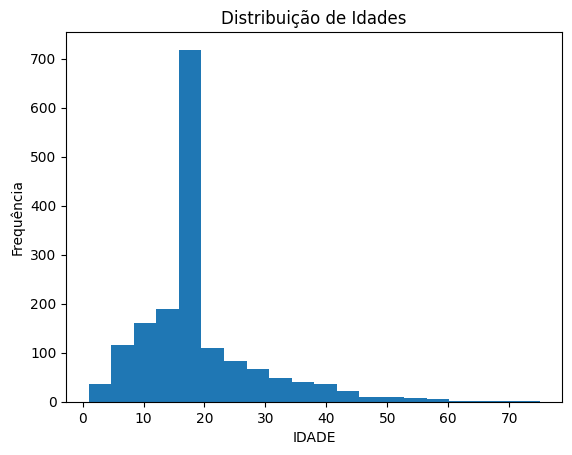

In [ ]:
# Análisar a distribuição de valores em 'IDADE' para verificar outliers
plt.hist(df['IDADE'], bins=20)
plt.xlabel('IDADE')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')
plt.show()

In [ ]:
# Criar a coluna 'FAIXA ETARIA'
df['FAIXA ETARIA'] = df['IDADE'].apply(lambda x:
    'CRIANÇA' if x < 12 else
    'ADOLESCENTE' if x <= 18 else
    'ADULTO'
)
df['FAIXA ETARIA'] = df['FAIXA ETARIA'].astype(str)

In [ ]:
df.head()

,QTDE,DATA 1º CONTATO,NOME COMPLETO,IDADE,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,HORÁRIO,PROFESSOR,COMPARECEU,REAGENDAMENTO,SITUAÇÃO,OBSERVAÇÕES,GENERO,FAIXA ETARIA
0,1.0,2022-01-07,GRAZIELE,22,12 99614-0592,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,NaT,18h30,ALISSON,SIM,NaN,MATRICULADO,NaN,FEMININO,ADULTO
1,2.0,2022-01-07,CAMILA,19,11 94129-6714,INFORMAÇÕES,WHATSAPP,JAZZ,NaT,19H30,LIA,NÃO,NaN,SEMANA SOLIDÁRIA,NaN,FEMININO,ADULTO
2,3.0,2021-01-05,MAIARA GOUVEA,16,98841-5432,AULA EXPERIMENTAL,WHATS,K-POP,NaT,19H00,ALISSON,NÃO FICOU,NaN,NÃO RESPONDE,NaN,FEMININO,ADOLESCENTE
3,4.0,2021-01-05,ENIALE RAMOS QUINTINO MÃE ELAINE,11,99124-9509,AULA EXPERIMENTAL,WHATS,JAZZ,NaT,17H00,LIA,MATRICULADO,NaN,MATRICULADO,NaN,MASCULINO,CRIANÇA
4,5.0,2022-01-07,BIA,19,12 98129-7939,INFORMAÇÕES,WHATSAPP,MODALIDADES,NaT,-,-,NÃO,NaN,SEMANA SOLIDÁRIA,NaN,FEMININO,ADULTO


In [ ]:
# desnecessário aparecer no modelo (até poderiamos utilizar engenharia de recursos para ter uma ideia sobre a origem da pessoa pelo DDD, mas não é relevante neste caso pois possuimos o cadastro do aluno)
df['TELEFONE'] = df['TELEFONE'].apply(lambda x: '0000-0000')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1666 entries, 0 to 1673
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QTDE              203 non-null    float64       
 1   DATA 1º CONTATO   1666 non-null   object        
 2   NOME COMPLETO     1666 non-null   object        
 3   IDADE             1666 non-null   int64         
 4   TELEFONE          1666 non-null   object        
 5   STATUS            1665 non-null   object        
 6   VIA               1665 non-null   object        
 7   ESTILOS           1661 non-null   object        
 8   DATA AGENDAMENTO  222 non-null    datetime64[ns]
 9   HORÁRIO           1297 non-null   object        
 10  PROFESSOR         1370 non-null   object        
 11  COMPARECEU        1647 non-null   object        
 12  REAGENDAMENTO     37 non-null     object        
 13  SITUAÇÃO          1636 non-null   object        
 14  OBSERVAÇÕES       838 non-nul

In [ ]:
df['STATUS'].unique()

array(['AULA EXPERIMENTAL', 'INFORMAÇÕES', 'AULA ESPERIMENTAL',
       'INFORMAÇÕES ', 'CAPTAÇÃO', 'COREOGRAFIA', 'AULA AVULSA',
       'INFORMACOES', 'INFORMAÇÃO', 'INFORMAÇOES', nan], dtype=object)

In [ ]:
# Padronizar 'INFORMAÇÕES'
df['STATUS'] = df['STATUS'].str.replace(r'INFORMAÇÕES|INFORMACOES|INFORMAÇÃO|INFORMAÇOES', 'CAPTAÇÃO', regex=True)
# Substituir 'AULA AVULSA' por 'EXPERIMENTAL'
df['STATUS'] = df['STATUS'].str.replace('AULA AVULSA', 'AULA EXPERIMENTAL')

# Padronizar 'AULA ESPERIMENTAL'
df['STATUS'] = df['STATUS'].str.replace(r'AULA ESPERIMENTAL|AULA AULA EXPERIMENTAL|COREOGRAFIA', 'AULA EXPERIMENTAL', regex=True)

# Excluir nulos
df = df.dropna(subset=['STATUS'])
df['STATUS'] = df['STATUS'].astype(str)
df = df.rename(columns={'STATUS': 'TIPO CONTATO'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1665 entries, 0 to 1673
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QTDE              203 non-null    float64       
 1   DATA 1º CONTATO   1665 non-null   object        
 2   NOME COMPLETO     1665 non-null   object        
 3   IDADE             1665 non-null   int64         
 4   TELEFONE          1665 non-null   object        
 5   TIPO CONTATO      1665 non-null   object        
 6   VIA               1665 non-null   object        
 7   ESTILOS           1661 non-null   object        
 8   DATA AGENDAMENTO  222 non-null    datetime64[ns]
 9   HORÁRIO           1297 non-null   object        
 10  PROFESSOR         1370 non-null   object        
 11  COMPARECEU        1647 non-null   object        
 12  REAGENDAMENTO     37 non-null     object        
 13  SITUAÇÃO          1636 non-null   object        
 14  OBSERVAÇÕES       838 non-nul

In [ ]:
df['VIA'].unique()

array(['WHATSAPP', 'WHATS', 'INSTAGRAM', 'TELEFONE', 'PESSOALMENTE',
       'PRESENCIAL', 'PRESENCIAL ', 'SITE', 'VALE AULA', 'FACEBOOK',
       'MESSENGER', 'MAE JÁ É ALUNA', 'ALUNA'], dtype=object)

In [ ]:
df['VIA'] = df['VIA'].str.replace(r'WHATSAPPAPP|WHATSAPP', 'WHATSAPP', regex=True)
df['VIA'] = df['VIA'].str.replace(r'PESSOALMENTE|VALE |MAE JÁ É ALUNA|ALUNA|PRESENCIALAULA|PRESENCIAL ', 'PRESENCIAL', regex=True)
df['VIA'] = df['VIA'].str.replace('MESSENGER', 'FACEBOOK')
df['VIA'] = df['VIA'].astype(str)

In [ ]:
replacements = [
    ('JAZZ FUNK ', 'JAZZ FUNK'),
    ('JAZZ FUNKINICIANTE', 'JAZZ FUNK'),
    ('JAZZ FUNKINTERMEDIARIO', 'JAZZ FUNK'),
    ('JAZZFUNK', 'JAZZ FUNK'),
    ('Jazz', 'JAZZ'),
    ('JAZZ iniciante', 'JAZZ'),
    ('JAZZ INICIANTES', 'JAZZ'),
    ('JAZZ INICIANTE', 'JAZZ'),
    ('AULA DE BREAK', 'DANÇAS URBANAS'),
    ('JAZZE D URBANAS', 'DANÇAS URBANAS'),
]

for old, new in replacements:
    df['ESTILOS'] = df['ESTILOS'].str.replace(old, new, regex=True)

df['ESTILOS'] = df['ESTILOS'].str.replace(r'CONTEMPORANEO.*', 'CONTEMPORÂNEO', regex=True)
df['ESTILOS'] = df['ESTILOS'].str.replace(r'SAPATEADO.*|Sapateado', 'SAPATEADO', regex=True)
df['ESTILOS'] = df['ESTILOS'].str.replace(r'KPOP.*|K POP INTERMEDIARIO|K POP INICIANTE|kpop|K Pop|Kpop|K POP|KPOP|K -POP', 'K-POP', regex=True)
df['ESTILOS'] = df['ESTILOS'].str.replace(r'BALLET.*|KPOPBALLET.*|BALLEYT', 'BALLET CLÁSSICO', regex=True)
df['ESTILOS'] = df['ESTILOS'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
# Categorize os valores que não estão na lista de categorias específicas
specific_categories = ['JAZZ FUNK', 'JAZZ', 'K-POP', 'SAPATEADO', 'DANÇAS URBANAS', 'CONTEMPORÂNEO', 'BALLET CLÁSSICO']

In [ ]:
non_specific_values = df['ESTILOS'][~df['ESTILOS'].isin(specific_categories)]

In [ ]:
non_specific_values.count()

288

In [ ]:
df['ESTILOS'].value_counts()['DANÇAS URBANAS']

295

In [ ]:
# Encontre os cinco valores mais comuns que não estão na lista de categorias específicas
value_counts = df['ESTILOS'].value_counts()
top_5_values = value_counts[value_counts.index.isin(specific_categories)].nlargest(5).index.tolist()

# Contar os valores que não são iguais às categorias específicas
non_specific_counts = df['ESTILOS'][~df['ESTILOS'].isin(specific_categories)].value_counts()

# Distribua igualitariamente os valores que não estão na lista de categorias específicas entre os três valores mais comuns
non_specific_values = df['ESTILOS'][~df['ESTILOS'].isin(specific_categories)]

# Distribua os valores não específicos igualitariamente entre os valores principais
non_specific_distribution = np.random.choice(top_5_values, size=len(non_specific_values), p=[1/5, 1/5, 1/5,1/5,1/5])

# Substitua os valores não específicos com a distribuição gerada
df.loc[~df['ESTILOS'].isin(specific_categories), 'ESTILOS'] = non_specific_distribution


In [ ]:
# Preencher os valores vazios com "Não agendou"
df['DATA AGENDAMENTO'] = pd.to_datetime(df['DATA AGENDAMENTO'], errors='coerce').dt.date
df['DATA AGENDAMENTO'] = df['DATA AGENDAMENTO'].apply(lambda x: x.replace(year=2023) if x and x.year == 2032 else x)
df['DATA AGENDAMENTO'].fillna('Não agendou', inplace=True)

In [ ]:
# Renomear a coluna HORÁRIO para TURNO
df = df.rename(columns={'HORÁRIO': 'TURNO'})

In [ ]:
# Criar uma nova coluna com os dois primeiros caracteres da coluna 'TURNO'
# Utilizar a função apply com uma função lambda para processar cada valor na coluna 'TURNO'
df['TURNO_FIRST_TWO_DIGITS'] = df['TURNO'].apply(lambda x: x[:2] if isinstance(x, str) else str(x) if not pd.isnull(x) else '')

In [ ]:
df['TURNO'].unique()

array(['18h30', '19H30', '19H00', '17H00', '-', '20H00', '18H00', '16H00',
       '16H30', '21H00', '20H30', 'NOITE', '15H00', '17H30', 'TARDE',
       '16h30', '18h00', nan, 'MANHÃ', '19HOO', '19h00', '19h30', '17h30',
       '18H30', '16h00', '15H30', '15h40', '17h00', '14H30', '15h', '18H',
       'SÁBADO', '17h', '18h', '15H', '17H45', '18H45', '20h30', '8h00',
       '9H00', '16h15', '15h30', '15h00', '11h00', '10H00', '16H15',
       'SABADO', '19h30 ', '08H ', datetime.time(17, 30),
       datetime.time(18, 30), ' 18h30', '09H ', '08H', '10H', 'NÃO',
       '09H00', '8H00', 'NÃO ', '19H30 ', 'DE NOITE', '14H30 ', '17H30 ',
       '09h00', '9H', '9h', '16H', '16h'], dtype=object)

In [ ]:
# Substituir os valores especificados
values_to_replace1 = ['-', 'NO', '', '18:30:00', ' ', 'DE']
df['TURNO_FIRST_TWO_DIGITS'] = df['TURNO_FIRST_TWO_DIGITS'].replace(to_replace=values_to_replace1, value='19')

values_to_replace2 = ['TA', 'SÁ', 'SA', '17:30:00', 'NÃ']
df['TURNO_FIRST_TWO_DIGITS'] = df['TURNO_FIRST_TWO_DIGITS'].replace(to_replace=values_to_replace2, value='16')

values_to_replace3 = ['MA', '8h', '9H', ' 1', '8H','9h']
df['TURNO_FIRST_TWO_DIGITS'] = df['TURNO_FIRST_TWO_DIGITS'].replace(to_replace=values_to_replace3, value='10')

In [ ]:
df['TURNO_FIRST_TWO_DIGITS'] = df['TURNO_FIRST_TWO_DIGITS'].astype(int)

In [ ]:
# Criar uma nova coluna 'PERIODO' com as categorias MANHÃ, TARDE e NOITE
df['TURNO_FIRST_TWO_DIGITS'] = np.where((df['TURNO_FIRST_TWO_DIGITS'] > 6) & (df['TURNO_FIRST_TWO_DIGITS'] < 12), 'MANHÃ',
                         np.where((df['TURNO_FIRST_TWO_DIGITS'] >= 12) & (df['TURNO_FIRST_TWO_DIGITS'] < 18), 'TARDE', 'NOITE'))

In [ ]:
# Substituir dos valores 'Unknown' pela moda
moda_turno = df['TURNO'].mode()[0]
df['TURNO'] = df['TURNO'].replace('Unknown', moda_turno)
df['TURNO'] = df['TURNO_FIRST_TWO_DIGITS']
df['TURNO'] = df['TURNO'].astype(str)
df['TURNO'] = df['TURNO_FIRST_TWO_DIGITS']

In [ ]:
# Converter datas
datas = ['DATA 1º CONTATO']
for col in datas:
    df[col] = pd.to_datetime(df[col])
# Trazer o trismestre
df['TRIMESTRE'] = df['DATA 1º CONTATO'].dt.quarter
df['TRIMESTRE'] = df['TRIMESTRE'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1665 entries, 0 to 1673
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   QTDE                    203 non-null    float64       
 1   DATA 1º CONTATO         1665 non-null   datetime64[ns]
 2   NOME COMPLETO           1665 non-null   object        
 3   IDADE                   1665 non-null   int64         
 4   TELEFONE                1665 non-null   object        
 5   TIPO CONTATO            1665 non-null   object        
 6   VIA                     1665 non-null   object        
 7   ESTILOS                 1665 non-null   object        
 8   DATA AGENDAMENTO        1665 non-null   object        
 9   TURNO                   1665 non-null   object        
 10  PROFESSOR               1370 non-null   object        
 11  COMPARECEU              1647 non-null   object        
 12  REAGENDAMENTO           37 non-null     object       

In [ ]:
df['PROFESSOR'].unique()

array(['ALISSON', 'LIA', '-', 'BIANCA', 'NICOLAS', 'FERNANDO', 'GIBELI',
       'PAOLA', nan, 'GABRIELA', 'LOUBACH', 'ALISSIN', 'ALISSON ', 'LIA ',
       'CAROL', 'ISABELLY', 'LARISSA', 'AMANDA', 'CICERO', 'ALINE',
       'ALLISON ', 'CÍCERO', 'NÃO', 'ALISSON/LARI', 'TODAS', 'NÃO ',
       'LARISSA / ALISSON', 'FELIPE'], dtype=object)

In [ ]:
# Criar um dicionário de substituições
substituicoes = {
    r'ALISSIN.*|ALISSON .*|ALLISON ': 'ALISSON',
    'LIA ': 'LIA'
}
# Realizar as substituições em uma única linha
df['PROFESSOR'] = df['PROFESSOR'].replace(substituicoes, regex=True)
# Preencher valores nulos e substituir valores específicos
df['PROFESSOR'].fillna('NÃO INFORMADO', inplace=True)
df['PROFESSOR'] = df['PROFESSOR'].replace(['NÃO', 'NÃO ', '-', 'TODAS', 'LARISSA / ALISSON'], 'NÃO INFORMADO')
df['PROFESSOR'] = df['PROFESSOR'].astype(str)

In [ ]:
df['COMPARECEU'].unique()

array(['SIM', 'NÃO', 'NÃO FICOU', 'MATRICULADO', 'SEM RETORNO',
       'NÃO VEIO', 'MATRICULADA', 'VEIO', '-', 'AVULSO', 'NÃO RESPONDE',
       'NÃO VEIO ', 'ENROLADA', nan, 'MATRICULADO ', 'NÃO VAI FICAR',
       'AVULSA', 'CANCELOU', 'ANO QUE VEM',
       datetime.datetime(2023, 7, 31, 0, 0),
       datetime.datetime(2023, 4, 14, 0, 0),
       datetime.datetime(2023, 4, 13, 0, 0),
       datetime.datetime(2023, 4, 24, 0, 0),
       datetime.datetime(2023, 4, 25, 0, 0),
       datetime.datetime(2023, 4, 27, 0, 0),
       datetime.datetime(2023, 4, 28, 0, 0),
       datetime.datetime(2023, 5, 3, 0, 0),
       datetime.datetime(2023, 4, 20, 0, 0),
       datetime.datetime(2023, 5, 2, 0, 0),
       datetime.datetime(2023, 5, 4, 0, 0),
       datetime.datetime(2023, 5, 5, 0, 0),
       datetime.datetime(2023, 5, 12, 0, 0),
       datetime.datetime(2023, 5, 8, 0, 0),
       datetime.datetime(2023, 5, 19, 0, 0),
       datetime.datetime(2023, 5, 17, 0, 0),
       datetime.datetime(2023, 5, 

In [ ]:
# alterar para tipo string
df['COMPARECEU'] = df['COMPARECEU'].astype(str)

In [ ]:
# Definir os valores que devem ser considerados como 'SIM'
valores_sim = ['SIM', 'MATRICULADO', 'MATRICULADO ', 'CONFIRMADA', 'MATRICULADA', 'VEIO', '18//05/23']

# Definir os valores que devem ser considerados como 'NÃO'
valores_nao = ['nan','SUMIU','TODAS','NÃO ', 'ANO QUE VEM', 'NÃO VAI FICAR', 'AVULSA', 'CANCELOU', '-', 'AVULSO', 'NÃO RESPONDE', 'NÃO VEIO ', 'ENROLADA', 'SEM RETORNO', 'NÃO VEIO', 'NÃO', 'NÃO FICOU']

# Converter valores de data para objetos pd.Timestamp
df['COMPARECEU'] = pd.to_datetime(df['COMPARECEU'], errors='ignore')

# Substituir oss valores que conhenham 2023 por 'SIM', pois significa que marcou uma data
df['COMPARECEU'] = np.where(df['COMPARECEU'].str.startswith('2023'), 'SIM', df['COMPARECEU'])

# Substituir os valores que estão em 'valores_sim' por 'SIM'
df['COMPARECEU'] = np.where(df['COMPARECEU'].isin(valores_sim), 'SIM', df['COMPARECEU'])

# Substituir os valores que estão em 'valores_nao' por 'NÃO'
df['COMPARECEU'] = np.where(df['COMPARECEU'].isin(valores_nao), 'NÃO', df['COMPARECEU'])

In [ ]:
df['REAGENDAMENTO'].unique()

array([nan, 'SIM', 'NÃO'], dtype=object)

In [ ]:
df['REAGENDAMENTO'].fillna('NÃO', inplace=True)
df['REAGENDAMENTO'] = df['REAGENDAMENTO'].astype(str)

In [ ]:
df['SITUAÇÃO'].unique()

array(['MATRICULADO', 'SEMANA SOLIDÁRIA', 'NÃO RESPONDE', 'QUER BOLSA',
       'DCTOS BOLSA', 'OUTRA ESCOLA', 'CONFIRMADO',
       'ESTAVA SEM DINHEIRO MARÇO', 'PORTA ABERTA', 'MATRICULADA',
       'IRMÃ DE ALUNA', 'ENROLADA, NÃO RESPONDE', 'QUER GINASTICA', '-',
       'NÃO QUER MAIS', 'COMPARECEU 10/02', '2º SEMESTRE', 'PARATY',
       'SEM DINHEIRO', 'SEM RESPOSTA', 'VAI NO  SAPATEADO',
       'NÃO VEIO 23/02', 'NÃO ATENDE', 'QUER JAZZ', 'ENTRE JAZZ E STREET',
       'FICOU SEM CARRO EM 01/03', 'ASSINAR CONTRATO',
       'NÃO VEIO 23/03 e 25/02', 'NAÕ VEIO 25/02', 'INFORMAÇÕES',
       'COMPARECEU 22/02', 'AGENDADO', 'ESPERAR MAIS',
       'COMPLICADA DE HORÁRIO', 'CHOROU NA SALA',
       'COMPARECEU CRISE ANSIEDADE', 'ENROLADA', 'COMPARECEU 03/03',
       'SEM ENERGIA', 'NÃO VEIO 02/03', 'AVULSO',
       'COMPARECEU 04/03 - VAI FAZER JAZZ 18H',
       'AMIGA MATEUS Ñ CONSEGUIU VIR', 'MORA FORA',
       'VEIO ACOMPANHAR AMIGO', 'REMARCADO VÁRIAS VEZES - ENROLADA',
       'CANCELOU',

In [ ]:
# Condições para 'MATRICULADO'
contratado_conditions = df['SITUAÇÃO'].str.contains('CONTRAT|MATRICULA|CONFIRMADO|QUER GINASTICA|VAI NO  SAPATEADO|QUER JAZZ|ENTRE JAZZ E STREET|COMPARECEU 04/03 - VAI FAZER JAZZ 18H|COMPARECEU 04/05 - VAI FAZER JAZZ TB|QUER HORÁRIO NOTURNO|COMPARECEU 27/05 - VAI FAZER STREET|JÁ PASSEI VALORES, disse que ia fechar!*|JÁ PASSEI VALORES, disse que ia pensar.*|HORÁRIO PARA FILHA E MÃE JUNTAS|ADOROU, VAI FECHAR EM AGOSTO |FECHOU OUTRAS MODALIDADES|POLI DANCE|TANGO, DANÇA DE SALÃO|JÁ É ALUNA CBS|PLANO TRIBOS|TRIBOS', case=False) | df['OBSERVAÇÕES'].str.contains('CONTRAT|MATRICULA|CONFIRMADO|QUER GINASTICA|VAI NO  SAPATEADO|QUER JAZZ|ENTRE JAZZ E STREET|COMPARECEU 04/03 - VAI FAZER JAZZ 18H|COMPARECEU 04/05 - VAI FAZER JAZZ TB|QUER HORÁRIO NOTURNO|COMPARECEU 27/05 - VAI FAZER STREET|JÁ PASSEI VALORES, disse que ia fechar!*|JÁ PASSEI VALORES, disse que ia pensar.*|HORÁRIO PARA FILHA E MÃE JUNTAS|ADOROU, VAI FECHAR EM AGOSTO |FECHOU OUTRAS MODALIDADES|POLI DANCE|TANGO, DANÇA DE SALÃO|JÁ É ALUNA CBS|PLANO TRIBOS|TRIBOS', case=False)

# Condições para 'DESISTIU'
desistiu_conditions = df['SITUAÇÃO'].str.contains('|'.join(['NÃO', 'MATRICULADO', 'SEMANA SOLIDÁRIA', 'QUER BOLSA', 'DCTOS BOLSA', 'OUTRA ESCOLA', 'ESTAVA SEM DINHEIRO MARÇO', 'PORTA ABERTA', 'IRMÃ DE ALUNA', '-', 'PARATY', 'SEM DINHEIRO', 'SEM RESPOSTA', 'FICOU SEM CARRO EM 01/03', 'COMPARECEU 22/02', 'AGENDADO', 'ESPERAR MAIS', 'COMPLICADA DE HORÁRIO', 'CHOROU NA SALA', 'COMPARECEU CRISE ANSIEDADE', 'ENROLADA', 'SEM ENERGIA', 'AVULSO', 'AMIGA MATEUS Ñ CONSEGUIU VIR', 'MORA FORA', 'REMARCOU VÁRIAS VEZES - ENROLADA', 'CANCELOU', 'SEMANA SOLIDÁRIA ', 'HORÁRIO', 'SEM RESPOSTA ', 'SÓ PODE PERÍODO MANHÃ', 'DESMARCOU 28/05 - COVID', 'TELEFONE ERRADO', 'DESMARCOU 18/06 - covid', 'MODALIDADES - OFERECER EXPERIMENTAL', 'DESMARCOU', 'SEM TEL P/ CONTATO', 'CONTATO ANO PASSADO (SEM RESPOSTA)', 'VALORES', 'BOLSA', 'HORÁRIO ', 'BOLSISTA']), case=False) | df['OBSERVAÇÕES'].str.contains('|'.join(['NÃO', 'MATRICULADO', 'SEMANA SOLIDÁRIA', 'QUER BOLSA', 'DCTOS BOLSA', 'OUTRA ESCOLA', 'ESTAVA SEM DINHEIRO MARÇO', 'PORTA ABERTA', 'IRMÃ DE ALUNA', '-', 'PARATY', 'SEM DINHEIRO', 'SEM RESPOSTA', 'FICOU SEM CARRO EM 01/03', 'COMPARECEU 22/02', 'AGENDADO', 'ESPERAR MAIS', 'COMPLICADA DE HORÁRIO', 'CHOROU NA SALA', 'COMPARECEU CRISE ANSIEDADE', 'ENROLADA', 'SEM ENERGIA', 'AVULSO', 'AMIGA MATEUS Ñ CONSEGUIU VIR', 'MORA FORA', 'REMARCOU VÁRIAS VEZES - ENROLADA', 'CANCELOU', 'SEMANA SOLIDÁRIA ', 'HORÁRIO', 'SEM RESPOSTA ', 'SÓ PODE PERÍODO MANHÃ', 'DESMARCOU 28/05 - COVID', 'TELEFONE ERRADO', 'DESMARCOU 18/06 - covid', 'MODALIDADES - OFERECER EXPERIMENTAL', 'DESMARCOU', 'SEM TEL P/ CONTATO', 'CONTATO ANO PASSADO (SEM RESPOSTA)', 'VALORES', 'BOLSA', 'HORÁRIO ', 'BOLSISTA']), case=False)

# Condições para 'EM ABERTO'
em_aberto_conditions = df['SITUAÇÃO'].str.contains('|'.join(['VEIO', 'COMPARECEU 10/02', '2º SEMESTRE', 'INFORMAÇÕES', 'COMPARECEU 03/03', 'COMPARECEU 10/05 - BOLSA', 'COMPARECEU 25/05 - GOSTA DE BALLET', 'OFERECI AULA - retorna quando der', 'VAI RETORNAR QUANDO DER', 'TALVEZ ANO QUE VEM', 'AGUARDANDO RETORNO (TAP)', 'TALVEZ NOVEMBRO', 'VAI VERIFICAR HORARIOS E RETORNA', 'RETORNAR FUTURAMENTE', 'VALE AULA', 'RETORNAR FUTURAMENTE FEZ AULA 4/4', 'RETORNAR FUTURAMENTE FEZ AULA 16/3', 'DIZ QUE VAI FECHAR EM MAIO', 'JÁ PASSEI VALORES', 'JÁ PASSEI VALORES.', 'JÁ PASSEI OS VALORES.', 'FORA DO ORÇAMENTO', 'ENTRAR EM CONTATO FUTURAMENTE ', '2 ANOS DE IDADE, MUITO PEQUENA PRA AULA.', 'VAI FAZER MAIS AULAS EXPERIMENTAIS', 'DISSE QUE VAI FECHAR EM JUNHO ', 'IDADE', 'VAI VIAJAR ', 'QUER PAGAR POR AULA', 'AULAS PARA GRÁVIDA', 'CANCELOU E REMARCOU', 'RETORNAR FUTURAMENTE ', 'VAI VER COM A FILHA DE FECHAR AS DUAS.', 'VAI VER COM A ESPOSA.', 'QUERIA AULA SAB/DOMINGO', 'BEBÊ DE UM ANO DE IDADE.', 'VAI MARCAR', 'VAI SE ORGANIZAR PRA TRAZER A FILHA.', 'PROXIMO SEMESTRE', 'AGENDOU OUTRA AULA EXPERIMENTAL', 'VAI REAGENDAR NOVAMENTE, FOI PARA RJ', 'PROVAVELMENTE EM SETEMBRO', 'VAI FAZER OUTRA AULA P/ INICIANTES', 'REAGENDADO', 'VAI REAGENDAR', 'FICARA ATÉ OUTUBRO', 'ESTA SAINDO DO EMPREGO.', 'VAI ANALISAR', 'NUNCA CONSEGUI VIR', 'SOMENTE PROXIMO ANO', 'SUMIU', 'VAI REAGENDAR NOVAMENTE, MAIS PARA FRENTE', 'VAI REALIZAR OUTRA AULA D.U', 'VAI REAGENDAR QUANDO CONSEGUIR.', 'VOLTA EM 2024', 'AGUARDANDO 2024 (VESTIBULAR)', 'VAI REAGENDAR PARA FEVEREIRO', 'VAI VERIFICAR', 'VAI PENSAR, TALVEZ RETORNE EM MARÇO', 'IMPREVISTO', 'VAI REALIZAR EXP. DANÇAS URBANAS', 'GOSTOU, VAI ANALISAR', 'VAI ANALISAR COM A MÃE', 'Aluna da Apus', 'MARÇO']), case=False) | df['OBSERVAÇÕES'].str.contains('|'.join(['VEIO', 'COMPARECEU 10/02', '2º SEMESTRE', 'INFORMAÇÕES', 'COMPARECEU 03/03', 'COMPARECEU 10/05 - BOLSA', 'COMPARECEU 25/05 - GOSTA DE BALLET', 'OFERECI AULA - retorna quando der', 'VAI RETORNAR QUANDO DER', 'TALVEZ ANO QUE VEM', 'AGUARDANDO RETORNO (TAP)', 'TALVEZ NOVEMBRO', 'VAI VERIFICAR HORARIOS E RETORNA', 'RETORNAR FUTURAMENTE', 'VALE AULA', 'RETORNAR FUTURAMENTE FEZ AULA 4/4', 'RETORNAR FUTURAMENTE FEZ AULA 16/3', 'DIZ QUE VAI FECHAR EM MAIO', 'JÁ PASSEI VALORES', 'JÁ PASSEI VALORES.', 'JÁ PASSEI OS VALORES.', 'FORA DO ORÇAMENTO', 'ENTRAR EM CONTATO FUTURAMENTE ', '2 ANOS DE IDADE, MUITO PEQUENA PRA AULA.', 'VAI FAZER MAIS AULAS EXPERIMENTAIS', 'DISSE QUE VAI FECHAR EM JUNHO ', 'IDADE', 'VAI VIAJAR ', 'QUER PAGAR POR AULA', 'AULAS PARA GRÁVIDA', 'CANCELOU E REMARCOU', 'RETORNAR FUTURAMENTE ', 'VAI VER COM A FILHA DE FECHAR AS DUAS.', 'VAI VER COM A ESPOSA.', 'QUERIA AULA SAB/DOMINGO', 'BEBÊ DE UM ANO DE IDADE.', 'VAI MARCAR', 'VAI SE ORGANIZAR PRA TRAZER A FILHA.', 'PROXIMO SEMESTRE', 'AGENDOU OUTRA AULA EXPERIMENTAL', 'VAI REAGENDAR NOVAMENTE, FOI PARA RJ', 'PROVAVELMENTE EM SETEMBRO', 'VAI FAZER OUTRA AULA P/ INICIANTES', 'REAGENDADO', 'VAI REAGENDAR', 'FICARA ATÉ OUTUBRO', 'ESTA SAINDO DO EMPREGO.', 'VAI ANALISAR', 'NUNCA CONSEGUI VIR', 'SOMENTE PROXIMO ANO', 'SUMIU', 'VAI REAGENDAR NOVAMENTE, MAIS PARA FRENTE', 'VAI REALIZAR OUTRA AULA D.U', 'VAI REAGENDAR QUANDO CONSEGUIR.', 'VOLTA EM 2024', 'AGUARDANDO 2024 (VESTIBULAR)', 'VAI REAGENDAR PARA FEVEREIRO', 'VAI VERIFICAR', 'VAI PENSAR, TALVEZ RETORNE EM MARÇO', 'IMPREVISTO', 'VAI REALIZAR EXP. DANÇAS URBANAS', 'GOSTOU, VAI ANALISAR', 'VAI ANALISAR COM A MÃE', 'Aluna da Apus', 'MARÇO']), case=False)

# Criar a coluna com a resposta
df['SITUAÇÃO_FINAL'] = np.select([contratado_conditions, desistiu_conditions, em_aberto_conditions], ['MATRICULADO', 'DESISTIU', 'EM ABERTO'], default='DESISTIU')
df['SITUAÇÃO'] = df['SITUAÇÃO'].astype(str)

In [ ]:
df['SITUAÇÃO'].count()

1665

In [ ]:
print(df.isnull().sum())

QTDE                      1462
DATA 1º CONTATO              0
NOME COMPLETO                0
IDADE                        0
TELEFONE                     0
TIPO CONTATO                 0
VIA                          0
ESTILOS                      0
DATA AGENDAMENTO             0
TURNO                        0
PROFESSOR                    0
COMPARECEU                   0
REAGENDAMENTO                0
SITUAÇÃO                     0
OBSERVAÇÕES                827
GENERO                       0
FAIXA ETARIA                 0
TURNO_FIRST_TWO_DIGITS       0
TRIMESTRE                    0
SITUAÇÃO_FINAL               0
dtype: int64


In [ ]:
df['OBSERVAÇÕES'].fillna('Sem observações', inplace=True)
df['OBSERVAÇÕES'] = df['OBSERVAÇÕES'].astype(str)

In [ ]:
df = df[['DATA 1º CONTATO','TRIMESTRE', 'NOME COMPLETO', 'IDADE', 'FAIXA ETARIA','GENERO', 'TELEFONE', 'TIPO CONTATO', 'VIA', 'ESTILOS', 'DATA AGENDAMENTO', 'TURNO', 'PROFESSOR', 'COMPARECEU', 'SITUAÇÃO_FINAL']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1665 entries, 0 to 1673
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA 1º CONTATO   1665 non-null   datetime64[ns]
 1   TRIMESTRE         1665 non-null   int64         
 2   NOME COMPLETO     1665 non-null   object        
 3   IDADE             1665 non-null   int64         
 4   FAIXA ETARIA      1665 non-null   object        
 5   GENERO            1665 non-null   object        
 6   TELEFONE          1665 non-null   object        
 7   TIPO CONTATO      1665 non-null   object        
 8   VIA               1665 non-null   object        
 9   ESTILOS           1665 non-null   object        
 10  DATA AGENDAMENTO  1665 non-null   object        
 11  TURNO             1665 non-null   object        
 12  PROFESSOR         1665 non-null   object        
 13  COMPARECEU        1665 non-null   object        
 14  SITUAÇÃO_FINAL    1665 non-nu

In [ ]:
df.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,GENERO,TELEFONE,TIPO CONTATO,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,Não agendou,NOITE,ALISSON,SIM,MATRICULADO
1,2022-01-07,1,CAMILA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,Não agendou,NOITE,LIA,NÃO,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADOLESCENTE,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,K-POP,Não agendou,NOITE,ALISSON,NÃO,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,CRIANÇA,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATS,JAZZ,Não agendou,TARDE,LIA,SIM,MATRICULADO
4,2022-01-07,1,BIA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ FUNK,Não agendou,NOITE,NÃO INFORMADO,NÃO,DESISTIU


<h1><font size="5" color="#FF69B4">Exportação arquivo</font></h1>

<p><font size="4">Exportar o arquivo com as formatações e filtros.</font></p>

In [ ]:
# Crie o objeto ExcelWriter
with pd.ExcelWriter('CrmAgendaClientes.xlsx', engine='xlsxwriter') as writer:
    # Exporte o DataFrame para o arquivo xlsx
    df.to_excel(writer, sheet_name='CRM', index=False)

    # Formate a planilha
    workbook = writer.book
    worksheet = writer.sheets['CRM']

    # Adicione o filtro ao cabeçalho
    worksheet.autofilter(0, 0, 0, len(df.columns) - 1)

    # Formatação do cabeçalho
    header_format = {
        'bold': True,
        'font_size': 12,
        'align': 'center',
        'valign': 'vcenter',
        'fg_color': '#D3D3D3',
        'border': 1
    }
    header_format_obj = workbook.add_format(header_format)
    for col_num, value in enumerate(df.columns.values):
        worksheet.write(0, col_num, value, header_format_obj)

    # Formatação das células
    cell_format = {
        'font_size': 11,
        'align': 'center',
        'valign': 'vcenter',
        'border': 1
    }
    cell_format_obj = workbook.add_format(cell_format)

    date_format = {
        'num_format': 'dd/mm/yyyy'
    }
    date_format_obj = workbook.add_format(date_format)

    for row_num, row_data in enumerate(df.values):
        for col_num, value in enumerate(row_data):
            if pd.isnull(value):
                worksheet.write(row_num + 1, col_num, '', cell_format_obj)
            elif col_num in [0, 9]:  # Adicione a coluna 1
                worksheet.write(row_num + 1, col_num, value, date_format_obj)
            else:
                worksheet.write(row_num + 1, col_num, value, cell_format_obj)

    # Ajuste a largura das colunas
    for col_num, col_width in enumerate([20, 20, 20]):
        worksheet.set_column(col_num, col_num, col_width)